In [1]:
#Enter your solution here
import pandas as pd
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
import folium
from folium import plugins
from folium.features import DivIcon
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import plotly.plotly as py
import plotly.graph_objs as go
col=['black','red','purple','blue','green']



In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [3]:
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='MyNewPass', db='chicagotaxidb')

In [4]:
def getRes(query):
    df = pd.read_sql(query, con=db)
    return df

In [118]:
db.close()

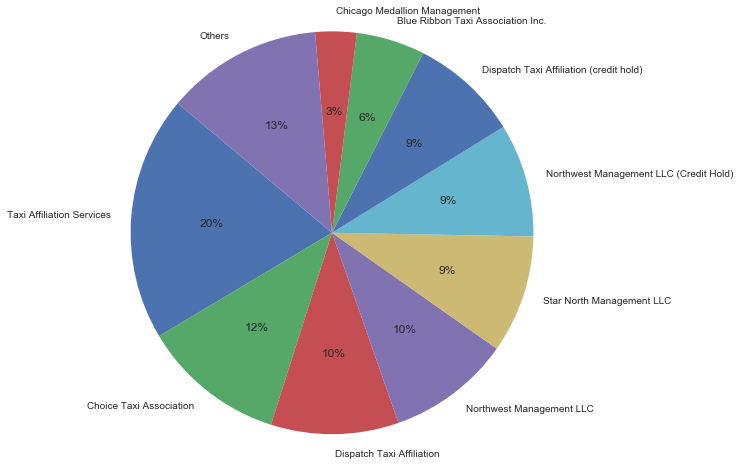

In [124]:
#Number of taxis owned by each company
query = '''
SELECT company, 
       Count(DISTINCT taxi_id) AS No_Of_Taxis 
FROM   c_taxi 
GROUP  BY company 
ORDER  BY no_of_taxis DESC; 
'''
taxiComp = getRes(query)
trimTaxiComp = taxiComp.iloc[:9,:]
trimTaxiComp.loc[len(trimTaxiComp),:] = ["Others",taxiComp.iloc[9:,1].sum()]
fig = plt.figure(figsize=(8,8))
plt.pie(trimTaxiComp["No_Of_Taxis"], labels=trimTaxiComp["company"],
        autopct='%1.0f%%', shadow=False, startangle=140 )
#plt.legend(trimTaxiComp["No_Of_Taxis"], trimTaxiComp["Company"], loc="best")
#autopct='%1.1f%%'
plt.axis('equal')
plt.show()

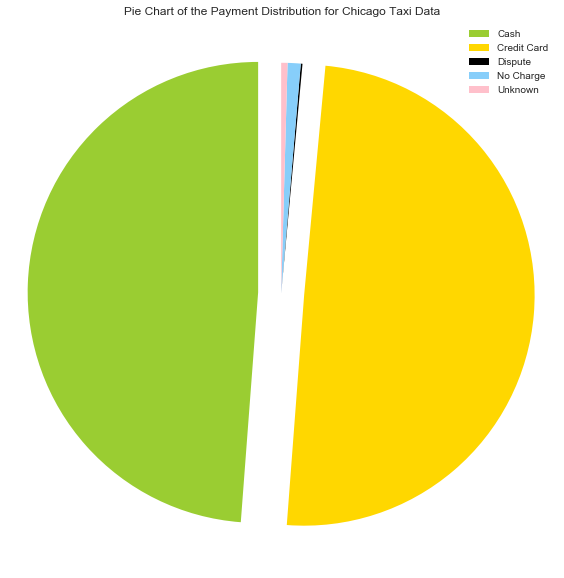

In [8]:
# Data to plot
paymentType_sql ='''
SELECT 
    COUNT(1) AS 'Count', Payment_Type
FROM
    c_taxi
GROUP BY 
Payment_Type;
'''
paymenttype_Df = getRes(paymentType_sql)
labels = paymenttype_Df['Payment_Type']
sizes = paymenttype_Df['Count']
colors = ['yellowgreen', 'gold', 'black', 'lightskyblue','pink']
explode = (0.1, 0.1 , 0, 0 , 0) 
fig = plt.figure(figsize=(8,8))
patches, texts = plt.pie(sizes, explode = explode , colors=colors, startangle=90 )
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.title('Pie Chart of the Payment Distribution for Chicago Taxi Data')
plt.show()

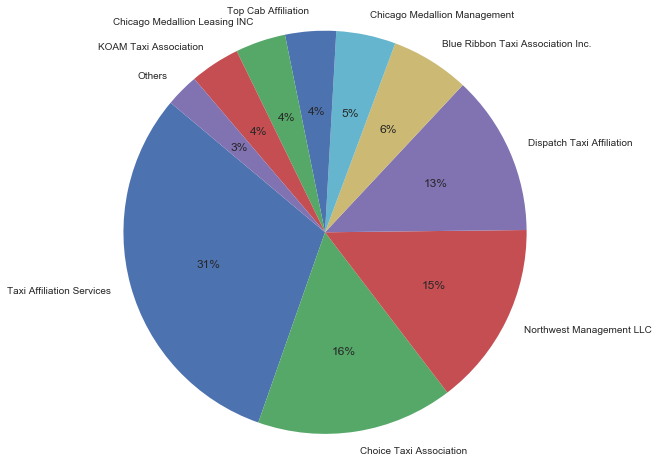

In [123]:
#Company Market share by revenue
query='''
SELECT company, 
       Sum(trip_total) Revenue, 
       Count(1)        AS Number_Of_Trips 
FROM   c_taxi 
GROUP  BY company 
ORDER  BY revenue DESC; 
'''
compRev = getRes(query)

trimCompRev = compRev.iloc[:9,:]
trimCompRev.loc[len(trimCompRev),:] = ["Others",compRev.iloc[10:,1].sum(),compRev.iloc[10:,2].sum()]
display(trimCompRev)
fig = plt.figure(figsize=(8,8))
plt.pie(trimCompRev["Revenue"], labels=trimCompRev["company"],
        autopct='%1.0f%%', shadow=False, startangle=140 )
#plt.legend(trimTaxiComp["No_Of_Taxis"], trimTaxiComp["Company"], loc="best")
#autopct='%1.1f%%'
plt.axis('equal')
plt.show()

In [78]:
#Max tipped company
tips = getRes("select * from (select Company,avg(Tips) Tips_Made, count(1) as Trips from c_taxi group by Company) tip where Trips >100 order by Tips_Made desc;")

,Company,Tips_Made,Trips
0,Blue Ribbon Taxi Association Inc.,2.578735,3819
1,Choice Taxi Association,2.183520,12324
2,Top Cab Affiliation,1.947765,3253
3,Northwest Management LLC,1.851098,13308
4,Taxi Affiliation Services,1.825590,24519
5,KOAM Taxi Association,1.804867,3230
6,Chicago Medallion Management,1.794647,3796
7,Unknown,1.779015,83082
8,Dispatch Taxi Affiliation,1.739501,12251
9,Chicago Medallion Leasing INC,1.706875,3402


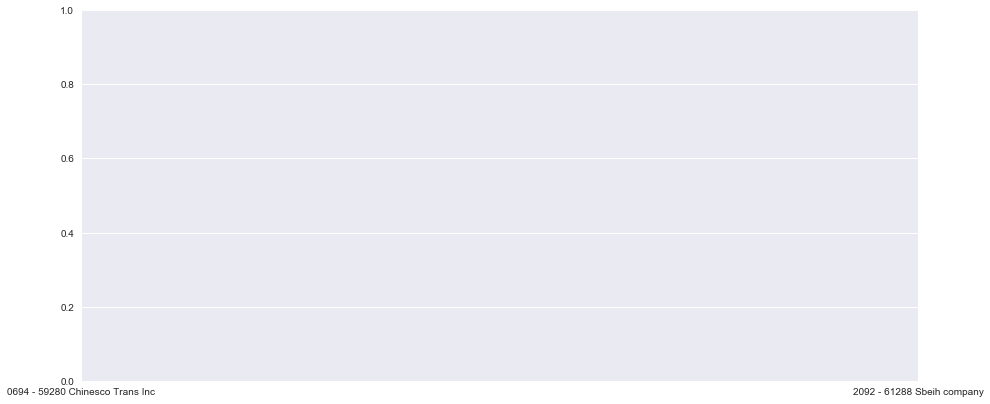

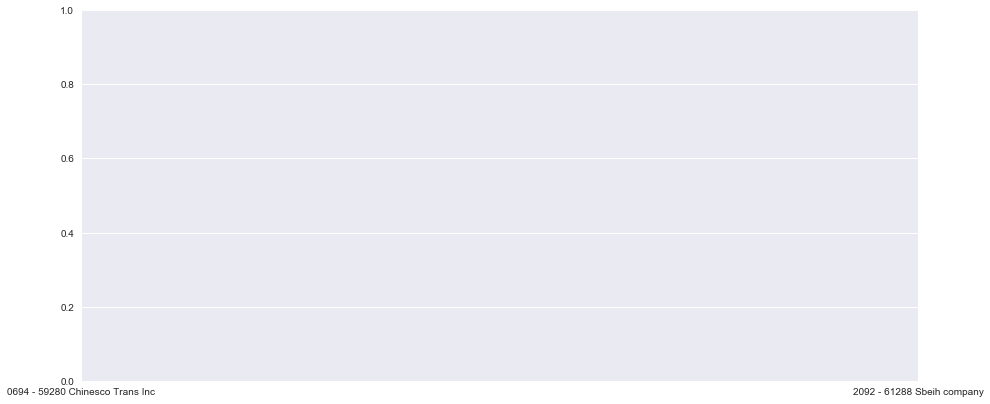

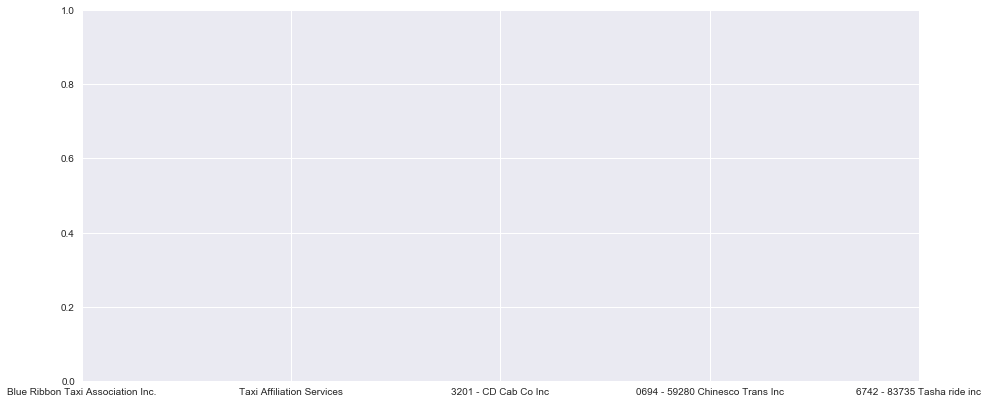

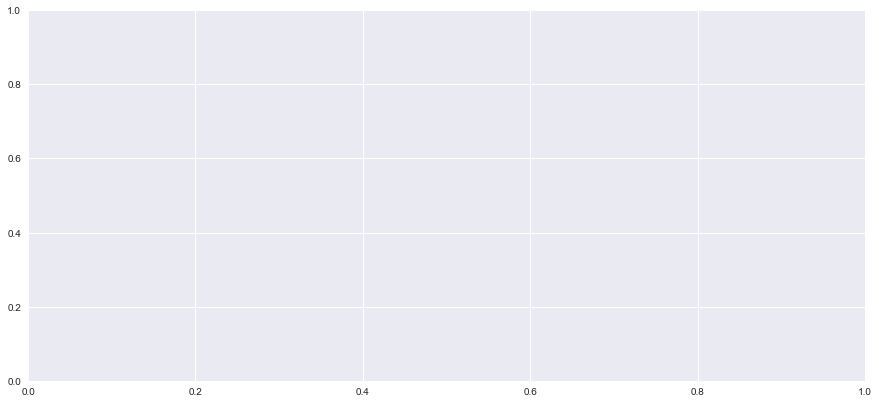

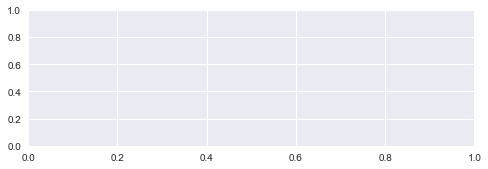

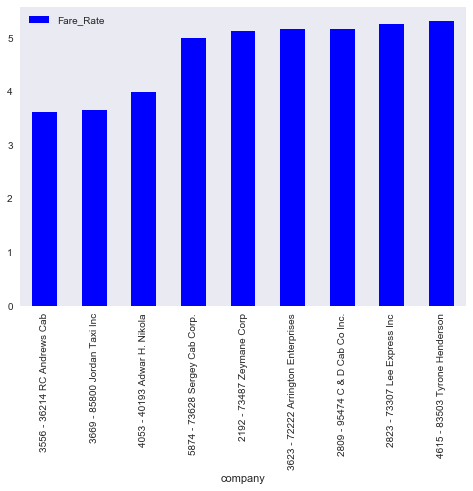

In [21]:
#Average Fare_Rate per company
query = '''
SELECT * 
FROM   (SELECT company, 
               Avg(fare / trip_miles)            AS Fare_Rate, 
               Avg(( fare / trip_seconds ) * 60) AS Fare_Minute, 
               Avg(trip_miles)                   AS Avg_Trip_Miles, 
               Count(1)                          AS No_Of_Trips 
        FROM   c_taxi 
        GROUP  BY company) cr 
WHERE  no_of_trips > 100 
ORDER  BY fare_rate DESC
limit 10; 
'''
frCompHigh = getRes(query)
query = '''
SELECT * 
FROM   (SELECT company, 
               Avg(fare / trip_miles)            AS Fare_Rate, 
               Avg(( fare / trip_seconds ) * 60) AS Fare_Minute, 
               Avg(trip_miles)                   AS Avg_Trip_Miles, 
               Count(1)                          AS No_Of_Trips 
        FROM   c_taxi 
        GROUP  BY company) cr 
WHERE  no_of_trips > 100 
ORDER  BY fare_rate 
limit 10; 
'''
frCompLow = getRes(query)

fig = plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
frCompHigh[:9].plot(x= "company",y = "Fare_Rate",secondary_y= "Avg_Trip_Miles",kind='Bar',color = 'Red' )
plt.xlabel('Company')
plt.ylabel('Fare per mile')
plt.title('Fare per mile for costly taxi services')
#plt.show()

plt.subplot(2, 1, 2)

frCompLow[:9].plot(x= "company",y = "Fare_Rate",secondary_y= "Avg_Trip_Miles",kind='Bar',color = 'Blue')
plt.xlabel('Company')
plt.ylabel('Fare per mile')
plt.title('Fare per mile for cheap taxi services')


plt.show()

In [15]:
frCompHigh["company"]

0    Blue Ribbon Taxi Association Inc.
1            Taxi Affiliation Services
2                 3201 - CD Cab Co Inc
3      0694 - 59280 Chinesco Trans Inc
4          6742 - 83735 Tasha ride inc
5            5724 - 75306 KYVI Cab Inc
6             5006 - 39261 Salifu Bawa
7           2092 - 61288 Sbeih company
8               3591 - 63480 Chuks Cab
9              6743 - 78771 Luhak Corp
Name: company, dtype: object

In [122]:
#Average Fare_Rate by community Area top 5
query = '''
SELECT dt.*, 
       pl.* ,
       comm.*
FROM   (SELECT * 
        FROM   (SELECT pickup_community_area, 
                       Avg(fare / trip_miles)            AS Fare_Rate, 
                       Avg(( fare / trip_seconds ) * 60) AS Fare_Minute, 
                       Count(1)                          AS No_Of_Trips 
                FROM   c_taxi 
                GROUP  BY pickup_community_area) cr 
        WHERE  no_of_trips > 100) dt 
       JOIN (SELECT * 
             FROM   pickup_location) pl 
         ON ( pl.pickup_community_area = dt.pickup_community_area )
         join (select * from community) comm
         on(comm.community_area = pl.pickup_community_area)
ORDER  BY fare_rate DESC;  
'''
commRate = getRes(query)
commRateHead = commRate.head()
m = folium.Map(location = [41.881832, -87.623177], zoom_start = 10)
for dt in range(len(commRateHead)):
    tempdt = commRateHead.iloc[dt]
    markerCol = col[dt]
    dispStr = str(tempdt["Community_Name"]) + " $" + str(round(tempdt["Fare_Rate"], 2))
    folium.Marker(
        location = [tempdt["Avg_P_Lat"], tempdt["Avg_P_Long"]],
        popup = dispStr,
        icon = folium.Icon(color = markerCol)
    ).add_to(m)
m

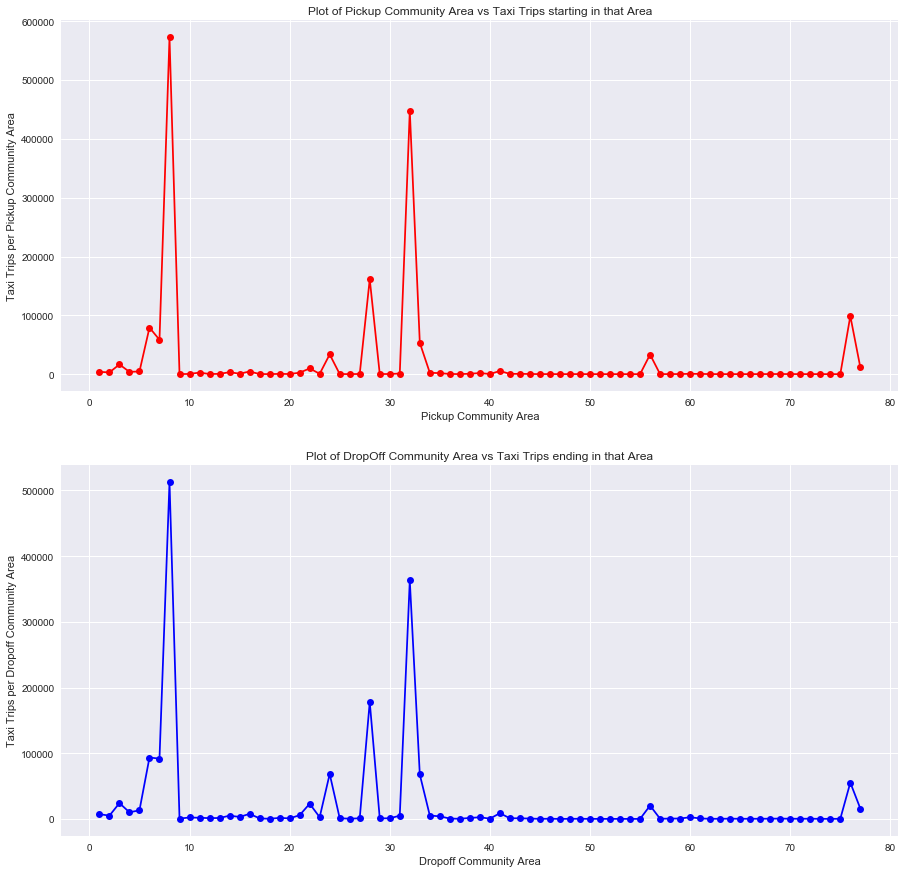

In [23]:
#Frequency of trips by pickup and dropoff community
#pickup community area 
query_pickup = '''
SELECT 
    COUNT(*) AS 'Taxi_Trips_per_Pickup_Community_Area',
    Pickup_Community_Area
FROM
    c_taxi
GROUP BY Pickup_Community_Area;
'''
pickupDF = getRes(query_pickup)

#dropoff community area 
query_dropoff = '''
SELECT 
    COUNT(*) AS 'Taxi_Trips_per_Dropoff_Community_Area',
    Dropoff_Community_Area
FROM
    c_taxi
GROUP BY Dropoff_Community_Area
'''
dropoffDF = getRes(query_dropoff)

fig = plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(pickupDF['Pickup_Community_Area'],pickupDF['Taxi_Trips_per_Pickup_Community_Area'],'-ok', color='Red')
plt.xlabel('Pickup Community Area')
plt.ylabel('Taxi Trips per Pickup Community Area')
plt.title('Plot of Pickup Community Area vs Taxi Trips starting in that Area')

plt.subplot(2, 1, 2)
plt.plot(dropoffDF['Dropoff_Community_Area'],dropoffDF['Taxi_Trips_per_Dropoff_Community_Area'],'-ok', color='blue')
plt.xlabel('Dropoff Community Area')
plt.ylabel('Taxi Trips per Dropoff Community Area')
plt.title('Plot of DropOff Community Area vs Taxi Trips ending in that Area')

plt.show()

In [125]:
#Dominance by Company per community area
query = '''
SELECT m.pickup_community_area, 
       n.company, 
       m.max_trips, 
       comm.community_Name,
       pl.*
FROM   ( (SELECT pickup_community_area, 
               Max(no_of_trips) AS Max_Trips 
        FROM   (SELECT pickup_community_area, 
                       company, 
                       Count(1) AS No_Of_Trips 
                FROM   c_taxi 
                WHERE  company != 'Unknown' 
                GROUP  BY pickup_community_area, 
                          company 
                ORDER  BY pickup_community_area, 
                          no_of_trips DESC) a 
        GROUP  BY pickup_community_area) m 
         JOIN (SELECT pickup_community_area, 
                      company, 
                      Count(1) AS No_Of_Trips 
               FROM   c_taxi 
               WHERE  company != 'Unknown' 
               GROUP  BY pickup_community_area, 
                         company) n 
           ON ( m.pickup_community_area = n.pickup_community_area 
                AND m.max_trips = n.no_of_trips )) 
join (select * from community) comm
         on(comm.community_area = m.pickup_community_area)
         join (select * from pickup_location) pl
on (pl.pickup_community_area = m.pickup_community_area)
'''
dom = getRes(query)
m = folium.Map(location = [41.881832, -87.623177], zoom_start = 10)
taxiComp = ["Taxi Affiliation Services","Dispatch Taxi Affiliation","Northwest Management LLC"]
taxiCol = ["blue","Red","green"]
for dt in range(len(dom)):
    tempdt = dom.iloc[dt]
    #markerCol = col[dt]
    dispStr = str(tempdt["Community_Name"]) +str("| ") + tempdt["company"]
    if(tempdt["company"] == taxiComp[0]):
        markerCol = taxiCol[0]
    elif(tempdt["company"] == taxiComp[1]):
        markerCol = taxiCol[1]
    elif(tempdt["company"] == taxiComp[2]):
        markerCol = taxiCol[2]
    else:
        markerCol = "purple"
    
    folium.Marker(
        location = [tempdt["Avg_P_Lat"], tempdt["Avg_P_Long"]],
        popup = dispStr,
        icon = folium.Icon(color = markerCol)
    ).add_to(m)
m

In [25]:
def getTaxiFlow(data,colList = col):
    m = folium.Map(location=[41.881832,-87.623177],zoom_start=10)
    attr = {'fill': '#007DEF', 'font-weight': 'bold', 'font-size': '24'}

    #col = ["#00ffff","#00e5e5","#00cccc","#00b2b2","#009999",]
    #col = ["#FF0000","#FF6600","#FFEE00","#99FF00","#00FF00"]
    for dt in range(len(data)):
        tempdt = data.iloc[dt]
        #tempdt = dt
        #print(tempdt)
        latLong = np.array(tempdt)[3:7]
        latLong = np.array(latLong.reshape((2,2)),dtype=list)
        #print(latLong)
        #folium.PolyLine([[42.0095, -87.6702],
        # [42.0015, -87.6949]]
        #).add_to(m)
        latLongdata = [[latLong[0][0], latLong[0][1]],
         [latLong[1][0], latLong[1][1]]]
        folium.PolyLine(latLongdata,color = colList[dt]
        ).add_to(m)
        #pickup
        folium.Marker(
        location = [latLong[0][0], latLong[0][1]],
        popup = tempdt["Pickup_Com"],
        icon = folium.Icon(color = "red")
        ).add_to(m)
        #Dropoff
        folium.Marker(
        location = [latLong[1][0], latLong[1][1]],
        popup = tempdt["Dropoff_Com"],
        icon = folium.Icon(color = "green")
        ).add_to(m)

        #folium.RegularPolygonMarker(location=(latLong[1][0], latLong[1][1]), fill_color='black', number_of_sides=10, radius=5).add_to(m)
        #folium.RegularPolygonMarker(location=(latLong[0][0], latLong[0][1]), fill_color='white', number_of_sides=10, radius=5).add_to(m)
    return m

In [26]:
#Busiest route
query = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 10) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;
'''
brTotal = getRes(query)
colorHex = ["#FF0000",	"#FF1100",	"#FF2200",	"#FF3300",	"#FF4400",	"#FF5500",	"#FF6600",	"#FF7700",	"#FF8800",	"#FF9900",	"#FFAA00",	"#FFBB00",	"#FFCC00",	"#FFDD00",	"#FFEE00",	"#FFFF00",	"#EEFF00",	"#DDFF00",	"#CCFF00",	"#BBFF00",	"#AAFF00",	"#99FF00",	"#88FF00",	"#77FF00",	"#66FF00",	"#55FF00",	"#44FF00",	"#33FF00",	"#22FF00",	"#11FF00",	"#00FF00"]
colorHex = ["black","blue","purple","red","orange","yellow","green","violet","#33cc33","#7b0b23"]
getTaxiFlow(brTotal,colList= colorHex)

In [27]:
#Busiest route by time slot
mornQ = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 07 AND 11 
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;
'''

aftQ = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 11 AND 15
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;

'''
eveQ = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 15 AND 19
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;

'''

niteQ = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 19 AND 24
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;
'''
lateNiteQ= '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 00 AND 07
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;'''

mor = getRes(mornQ);
aft = getRes(aftQ);
eve = getRes(eveQ);
nite = getRes(niteQ);
lnite = getRes(lateNiteQ);

In [28]:
print("Morning")
getTaxiFlow(mor)

Morning


In [29]:
print("Afternoon")
getTaxiFlow(aft)

Afternoon


In [30]:
print("Evening")
getTaxiFlow(eve)

Evening


In [32]:
print("Night")
getTaxiFlow(nite)

Night


In [33]:
print("Late Night")
getTaxiFlow(lnite)

Late Night


In [38]:
q_lm = '''
SELECT 
    Fare, Trip_Seconds, Trip_Miles
FROM
    c_taxi;
'''
lm_DF = getRes(q_lm)
lm_Input = lm_DF.iloc[:,1:3] 
regr = LinearRegression()
regr.fit(lm_Input,lm_DF['Fare'])
print("The Equation is :\n Fare = ",regr.intercept_ ,"+" , regr.coef_[0],"*",lm_Input.columns[0],"+",regr.coef_[1],"*",lm_Input.columns[1])

model = smf.ols(formula='Fare ~ Trip_Seconds + Trip_Miles', data=lm_DF)
results_formula = model.fit()
print(results_formula.params)



The Equation is :
 Fare =  1.75587809794 + 0.00999548747153 * Trip_Seconds + 1.03674813141 * Trip_Miles
Intercept       1.755878
Trip_Seconds    0.009995
Trip_Miles      1.036748
dtype: float64


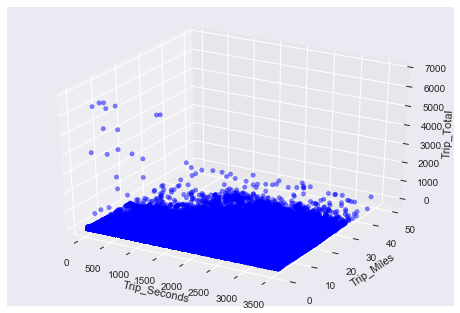

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lm_DF['Trip_Seconds'],lm_DF['Trip_Miles'],lm_DF['Fare'],c='blue', marker='o', alpha=0.5)
ax.set_xlabel('Trip_Seconds')
ax.set_ylabel('Trip_Miles')
ax.set_zlabel('Fare')
plt.show()

In [46]:
x = lm_DF['Trip_Seconds'][0:500]
y = lm_DF['Trip_Miles'][0:500]
z = lm_DF['Fare'][0:500]
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

1626819